Ref: https://github.com/Saket-Uoft/Artificial-Intelligence-for-Predicting-Materials-Properties/blob/master/AI_in_Materials_Science_Final_Project_-checkpoint.ipynb
        

In [5]:
import os
import sys
import pymatgen
import pymatgen.core
print(sys.path)

['/Users/carlytravis/Documents/Research/Arola NUWC Project/Jupyter Notebooks', '/Users/carlytravis/opt/anaconda3/envs/my_pymatgen/lib/python39.zip', '/Users/carlytravis/opt/anaconda3/envs/my_pymatgen/lib/python3.9', '/Users/carlytravis/opt/anaconda3/envs/my_pymatgen/lib/python3.9/lib-dynload', '', '/Users/carlytravis/opt/anaconda3/envs/my_pymatgen/lib/python3.9/site-packages', '/Users/carlytravis/opt/anaconda3/envs/my_pymatgen/lib/python3.9/site-packages/IPython/extensions', '/Users/carlytravis/.ipython']


In [1]:
import numpy as np  
import os
import glob
from os import chdir
import pandas as pd
from sklearn.model_selection import train_test_split
import time
from os import listdir
from os.path import isfile, join
import csv
import scipy.stats
from mpl_toolkits import mplot3d
from scipy.stats import norm
from scipy.stats import mode
from mpl_toolkits.mplot3d import Axes3D

In [3]:
from pymatgen.core import Molecule
from pymatgen.core import Element, Species, Composition

Molecule takes input arguments species and coords, and input keyword arguments charge, spin_multiplicity, validate_proximity and site_properties.
Keyword arguments come with a default value (the value after the equals sign), and so keyword arguments are optional.

Arguments (without default values) are mandatory.

You can also create Molecule objects from files. Let's say you have an *.xyz file called "water.xyz". You can import that into pymatgen with Molecule.from_file, like:

water = Molecule.from_file("water.xyz")
print(water)

print(c_monox)

Full Formula (C1 O1)
Reduced Formula: CO
Charge = 1, Spin Mult = 2
Sites (2)
0 C     0.000000     0.000000     0.000000
1 O     0.000000     0.000000     1.200000

A molecule is essentially a list of Site objects. We can access these sites like we would a list in Python. For example, to obtain the total number of sites in the molecule:

len(c_monox)

2

Or to access the first site (note that Python is a 0-indexed programming language, so the first site is site 0):

print(c_monox[0])

[0. 0. 0.] C

And just like a list, I can even change the elements of a molecule.

c_monox[0] = "O"

c_monox[1] = "C"

print(c_monox)



In [4]:
H_rad = Element('H').atomic_radius
C_rad = Element('C').atomic_radius
N_rad = Element('N').atomic_radius
HC_bond_dist = H_rad + C_rad
CN_bond_dist = C_rad + N_rad
H_pos = 0
C_pos = H_pos + HC_bond_dist
N_pos = C_pos + CN_bond_dist
hcn = Molecule(['H','C','N'], [[H_pos, 0, 0], [C_pos, 0, 0],[N_pos, 0, 0]])
print(hcn)

Full Formula (H1 C1 N1)
Reduced Formula: HCN
Charge = 0.0, Spin Mult = 1
Sites (3)
0 H     0.000000     0.000000     0.000000
1 C     0.950000     0.000000     0.000000
2 N     2.300000     0.000000     0.000000


In [5]:
from pymatgen.core.structure import Structure

In [6]:
path = '/Users/carlytravis/Documents/Research /Arola NUWC Project/polymer_scientific_data_confirmed'
chdir(path)
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]

extension = 'cif'
filenames = [i for i in glob.glob('*.{}'.format(extension))]

print(filenames)
#Cu = Structure.from_file("0001.cif")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/carlytravis/Documents/Research /Arola NUWC Project/polymer_scientific_data_confirmed'

In [7]:
df1 = pd.DataFrame(filenames, columns=['cif'])
print(df1)
x = np.shape(df1)
rslt_df = df1.sort_values(by='cif')
print((x))

df1 = rslt_df.reset_index()
del df1['index']

NameError: name 'filenames' is not defined

In [8]:
Cu = Structure.from_file("0011.cif")

FileNotFoundError: [Errno 2] No such file or directory: '0011.cif'

In [ ]:
print(Cu)

In [10]:
from pymatgen import MPRester

ImportError: cannot import name 'MPRester' from 'pymatgen' (unknown location)

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/RUIMINMA1996/PI1M/master/PI1M_v2.csv'
df = pd.read_csv(url)

In [ ]:
print(df.shape)
df.head()

In [ ]:
#url1 = 'https://raw.githubusercontent.com/Saket-Uoft/Artificial-Intelligence-for-Predicting-Materials-Properties/master/molecules.csv'
#df1 = pd.read_csv(url1)


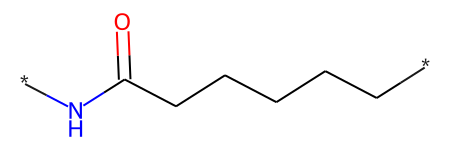

In [9]:
import os
import rdkit
from rdkit.Chem import AllChem

from rdkit.Chem import rdmolfiles
#rdkit.Chem.rdmolfiles.AtomFromSmiles('C1NCN1')
mol = rdkit.Chem.MolFromSmiles('*CCCCCC(=O)N*')
mol

In [ ]:
 Poly((3,4'-oxydianiline)-alt-{alpha,alpha'-bis[4-(4-carboxyphenoxy)phenyl]-1,4-diisopropylbenzene})

In [36]:
confirmed_df = pd.read_csv('/Users/carlytravis/Documents/Research/Arola NUWC Project/Polymers/PolymerSMILESoct.csv', sep=',') 
confirmed_df.head()


,ID,P010001,ID.1,Name,Polymer Smiles,Monomer Smiles 1,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Name,polyethene,P010001,polyethene,*C*,C=C,NaN,NaN,NaN
1,Polymer Smiles,*C*,P010001,poly(diazomethane),*C*,C=[N+]=[N-],NaN,NaN,NaN
2,Monomer Smiles 1,C=C,P010002,poly(prop-1-ene),CC(*)C*,CC=C,NaN,NaN,NaN
3,ID,P010001,P010003,poly(but-1-ene),CCC(*)C*,CCC=C,NaN,NaN,NaN
4,Name,poly(diazomethane),P010004,poly(pent-1-ene),CCCC(*)C*,CCCC=C,NaN,NaN,NaN


In [39]:
del confirmed_df['P010001']

In [40]:
confirmed_df.head()

,ID.1,Name,Polymer Smiles,Monomer Smiles 1,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,P010001,polyethene,*C*,C=C,NaN,NaN,NaN
1,P010001,poly(diazomethane),*C*,C=[N+]=[N-],NaN,NaN,NaN
2,P010002,poly(prop-1-ene),CC(*)C*,CC=C,NaN,NaN,NaN
3,P010003,poly(but-1-ene),CCC(*)C*,CCC=C,NaN,NaN,NaN
4,P010004,poly(pent-1-ene),CCCC(*)C*,CCCC=C,NaN,NaN,NaN


In [26]:
confirmed_df.head()

,ID,P010001,ID.1
0,Name,polyethene,P010001
1,Polymer Smiles,*C*,P010001
2,Monomer Smiles 1,C=C,P010002
3,ID,P010001,P010003
4,Name,poly(diazomethane),P010004
